In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
# Import data
data = pd.read_csv('Cluster_Problem.csv')
print(data.head(5))


   CUST    X    Y
0     1  118  119
1     2  199  167
2     3  160  196
3     4  171  186
4     5  186  111


In [3]:
# Divide into train and test; Resetting index in test
train = data[data['CUST']<=40]
test1 = data[data['CUST']>40]
test = test1.reset_index().drop(['index'], axis = 1)

print(train.head(5))
print(test.head(5))

   CUST    X    Y
0     1  118  119
1     2  199  167
2     3  160  196
3     4  171  186
4     5  186  111
   CUST    X    Y
0    41  334  336
1    42  380  320
2    43  320  312
3    44  335  387
4    45  382  307


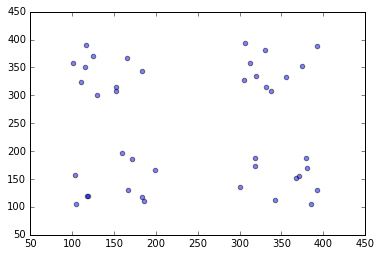

In [4]:
# Scatter plot
x = train['X']
y = train['Y']
plt.scatter(x, y, alpha=0.5)

In [5]:
# Running k-means cluster
kmeans = KMeans(n_clusters=4, random_state=0).fit(train[['X','Y']])
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 151.1  141.1]
 [ 336.6  348.9]
 [ 135.1  342.6]
 [ 355.8  151. ]]
[0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2]


##### See approx values of cluster:: Cluster 0: (150,150), Cluster 1: (350,350), Cluster 2: (150,350), Cluster 3: (350,150)... This will be useful while testing our predictions

##### Important part: Scoring the data using a created k-mean solution; We will use the predict function for it

In [6]:
#Scoring the test data using the cluster already created

cluster_val = pd.DataFrame(kmeans.predict(test[['X','Y']]).tolist())
cluster_val.columns = ['Cluster_Num']
Scored_Test_Data = pd.merge(test, cluster_val, how='inner', left_index=True, right_index=True)
print(Scored_Test_Data)

    CUST    X    Y  Cluster_Num
0     41  334  336            1
1     42  380  320            1
2     43  320  312            1
3     44  335  387            1
4     45  382  307            1
5     46  154  165            0
6     47  187  197            0
7     48  174  135            0
8     49  172  128            0
9     50  155  103            0
10    51  180  366            2
11    52  146  326            2
12    53  123  371            2
13    54  130  389            2
14    55  125  308            2
15    56  358  195            3
16    57  326  116            3
17    58  382  165            3
18    59  370  108            3
19    60  363  180            3
20    61  142  199            0
21    62  116  126            0
22    63  161  194            0
23    64  165  167            0
24    65  196  116            0
25    66  326  143            3
26    67  322  195            3
27    68  313  137            3
28    69  343  113            3
29    70  306  153            3
30    71

##### You can find that the scorings are perfect; Check the X & Y combination, and see the cluster centres for all the clusters